In [1]:
import pandas as pd
import sys
sys.path.append('../')
from utils.copernicus import CopernicusDEM

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 50)

In [3]:
#path = 'D:\\Simon\\Documents\\GP\\data\\datasets\\selected_bird_species.csv'
df_path = 'D:\\Simon\\Documents\\GP\\data\\datasets\\selected_bird_species_with_grids_50km.csv'
df = pd.read_csv(df_path, index_col=0)

C:\Users\simon\AppData\Local\Temp\ipykernel_9376\4057329078.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_path, index_col=0)


In [4]:
df.head(3)

,id_sighting,id_species,name_species,date,timing,coord_lat,coord_lon,precision,altitude,total_count,atlas_code,id_observer,country,eea_grid_id
0,29666972,8.0,Haubentaucher,2018-01-01,NaN,53.157760,8.676993,place,-1.051010,0.0,0,37718.0,de,50kmE4200N3300
1,29654244,397.0,Schwarzkehlchen,2018-01-01,NaN,53.127639,8.957263,square,0.760781,2.0,0,37803.0,de,50kmE4250N3300
2,29654521,463.0,Wiesenpieper,2018-01-01,NaN,50.850941,12.146953,place,270.831300,2.0,0,39627.0,de,50kmE4450N3050


### Add elevation features

In [5]:
copernicus = CopernicusDEM(raster_paths=['D:\\Simon\\Documents\\GP\\data\\util_files\\EU_DEM\\eu_dem_v11_E40N20.TIF', 'D:\\Simon\\Documents\\GP\\data\\util_files\\EU_DEM\\eu_dem_v11_E40N30.TIF'])
df = copernicus.get_elevation(df, lat_col='coord_lat', lon_col='coord_lon')

In [6]:
df['altitude'] = df['elevation']
df.drop(columns=['elevation'], inplace=True)

### PCA with elevation features

Text(7, 0.75, 'strong correlation')

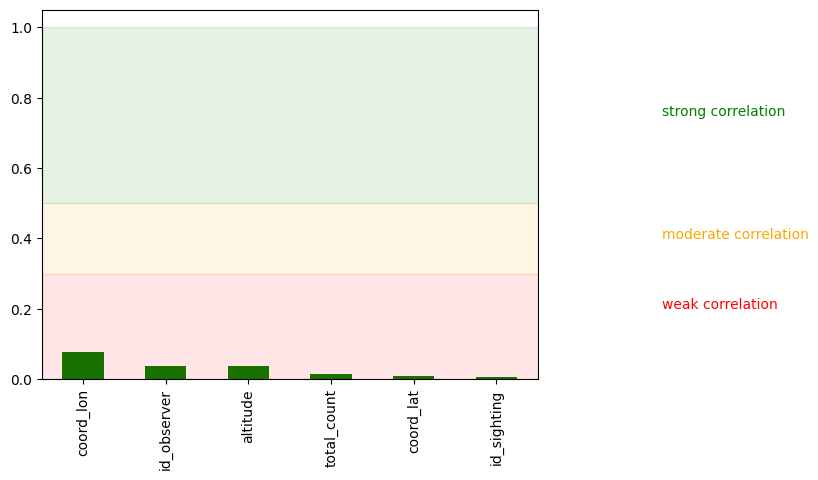

In [7]:
import matplotlib.pyplot as plt
df_for_pca = df.drop(columns=['name_species', 'date', 'timing', 'precision', 'atlas_code', 'country', 'eea_grid_id'])
df_corr = df_for_pca.corr()['id_species'].abs().sort_values(ascending=False)
df_corr.drop('id_species', inplace=True)
ax = df_corr.plot.bar(color='green')

ax.axhspan(0, 0.3, alpha=0.1, color='red')
ax.axhspan(0.3, 0.5, alpha=0.1, color='orange')
ax.axhspan(0.5, 1, alpha=0.1, color='green')
ax.text(7,0.2, s='weak correlation', color='red')
ax.text(7,0.4, s='moderate correlation', color='orange')
ax.text(7,0.75, s='strong correlation', color='green')

In [8]:
df.to_csv(df_path)